In [1]:
import pandas as pd
from ast import literal_eval
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import colors
plt.rcParams['figure.dpi'] = 300

In [9]:
def resi_list_to_sele(resi_list):
    return " or ".join(['resi ' + str(resi) for resi in resi_list])

# process construct mutations
constructs = pd.read_csv('../Data/Supp_TableS4_Construct_Summary.csv')
constructs = constructs[constructs.Name.str.contains('-')].copy()

muts = constructs['Designed mutations'].str.split(',').sum()
muts = [m.strip()[1:-1] for m in muts]
counter = Counter(muts)
counts = list(set(counter.values()))
count_to_sites = {v:[k for k in counter.keys() if counter[k]==v] 
    for v in counts}
color_array = plt.cm.Reds(np.linspace(0.1, 1, max(counts)-min(counts)+1))
count_to_color = {c: color_array[c-1][:-1] for c in count_to_sites.keys()}
pos = "+".join(set(muts))

In [10]:
#need to replace 683 with 689 - not resolved in structure

ofname= "../Figures/Fig1e_all_construct_mutations.pml"
pdb = "7bnn"

with open(ofname, 'w') as of_mean:
    of_mean.write(f"fetch {pdb}\n")
    of_mean.write("remove solvent\n")
    of_mean.write("remove not polymer.protein\n")
    of_mean.write("set specular, 0\n")
    of_mean.write("set depth_cue, 0\n")
    of_mean.write("set ambient, 0.5\n")
    of_mean.write("set ray_trace_gain, 0\n")
    of_mean.write("set ray_trace_mode, 1\n")
    of_mean.write("set ray_trace_color, black\n")
    of_mean.write("set ray_trace_depth_factor, 1\n")
    of_mean.write("set ray_trace_disco_factor, 1\n")
    of_mean.write("set light_count, 2\n")
    of_mean.write("set ray_opaque_background, 0\n")
    
    of_mean.write(f"show cartoon, chain B\n set cartoon_loop_radius, 0.4\n")
    chain_list = " or ".join([f'chain {chain}' for chain in ["A","C"]])
    of_mean.write(f"show as spheres, {chain_list}\n")
    of_mean.write(f"show surface, {chain_list}\n")
    of_mean.write(f"hide cartoon, {chain_list}\n")
    of_mean.write("set transparency, 0.1\n")
    of_mean.write("color gray80, chain C\n")
    of_mean.write("color gray90, chain A\n")
    of_mean.write("color gray60, chain B\n")
    
    for count, sites in count_to_sites.items():
        of_mean.write(f"set_color count_{str(count)}, {list(count_to_color[count])}\n")
        of_mean.write(f"color count_{str(count)}, chain B and ({resi_list_to_sele(sites)})\n")

    of_mean.write(f"select muts, chain B and resi {pos} and n. CA\n")
    of_mean.write(f"show spheres, muts\n")
    of_mean.write(f"set sphere_scale, 1.3\n")
    of_mean.write("bg 0\n")

<ipython-input-11-e241250f84e9>:10: UserWarning: Use the colorbar set_ticks() method instead.
  plt.yticks([0,10,20,30],rotation=90, va='center')


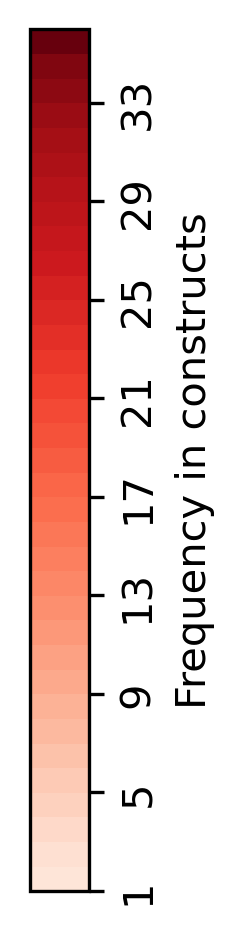

In [11]:
cmap = colors.ListedColormap(color_array)
bounds = list(range(min(counts), max(counts)+1))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(0.7,3), constrained_layout=True)
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
             cax=ax, orientation='vertical',
             label="Frequency in constructs")

plt.yticks([0,10,20,30],rotation=90, va='center')
fig.savefig('../Figures/Fig1e_all_construct_mutations_structure_cbar.png')